In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayanzadeh93/color-classification")

print("Path to dataset files:", path)

100%|██████████| 161M/161M [00:08<00:00, 21.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ayanzadeh93/color-classification/versions/1


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

print("Inside ColorClassification:", os.listdir(os.path.join(path, "ColorClassification")))
print("Inside colorclassification:", os.listdir(os.path.join(path, "colorclassification")))


Inside ColorClassification: ['testimg', 'timages.txt', 'mask_test', 'mask_green', 'Green', 'mask_yellow', 'm_images.txt', 'yellow', 'red', 'mask_brown', 'tm_images.txt', 'color-classification', 'White', 'Violet', 'mask_orange', 'mask_red', 'mask_white', 'hw3.m~', 'Blue', 'mask_blue', 'mask_black', 'Black', 'orange', 'mask_violet', 'images.txt', 'Brown']
Inside colorclassification: ['ColorClassification']


Loading images from: /kaggle/input/color-classification/ColorClassification
Processing folder: orange
Processing folder: yellow
Processing folder: Black
Processing folder: Blue
Processing folder: White
Processing folder: Green
Processing folder: red
Processing folder: Violet
Processing folder: Brown

DATASET INFORMATION

Dataset shape: (117, 3072)

Class labels: ['Black' 'Blue' 'Brown' 'Green' 'Violet' 'White' 'orange' 'red' 'yellow']
Encoded labels (sample): [6 6 6 6 6 6 6 6 6 6]

Class distribution:
  Black: 11 samples (9.40%)
  Blue: 10 samples (8.55%)
  Brown: 20 samples (17.09%)
  Green: 7 samples (5.98%)
  Violet: 20 samples (17.09%)
  White: 17 samples (14.53%)
  orange: 10 samples (8.55%)
  red: 12 samples (10.26%)
  yellow: 10 samples (8.55%)

Training set size: 93
Test set size: 24

TRAINING SVM MODELS

1. Training Linear SVM...
   Linear SVM Accuracy: 0.7083

2. Training RBF SVM...
   RBF SVM Accuracy: 0.7500

3. Training Polynomial SVM...
   Polynomial SVM Accuracy: 0.5833


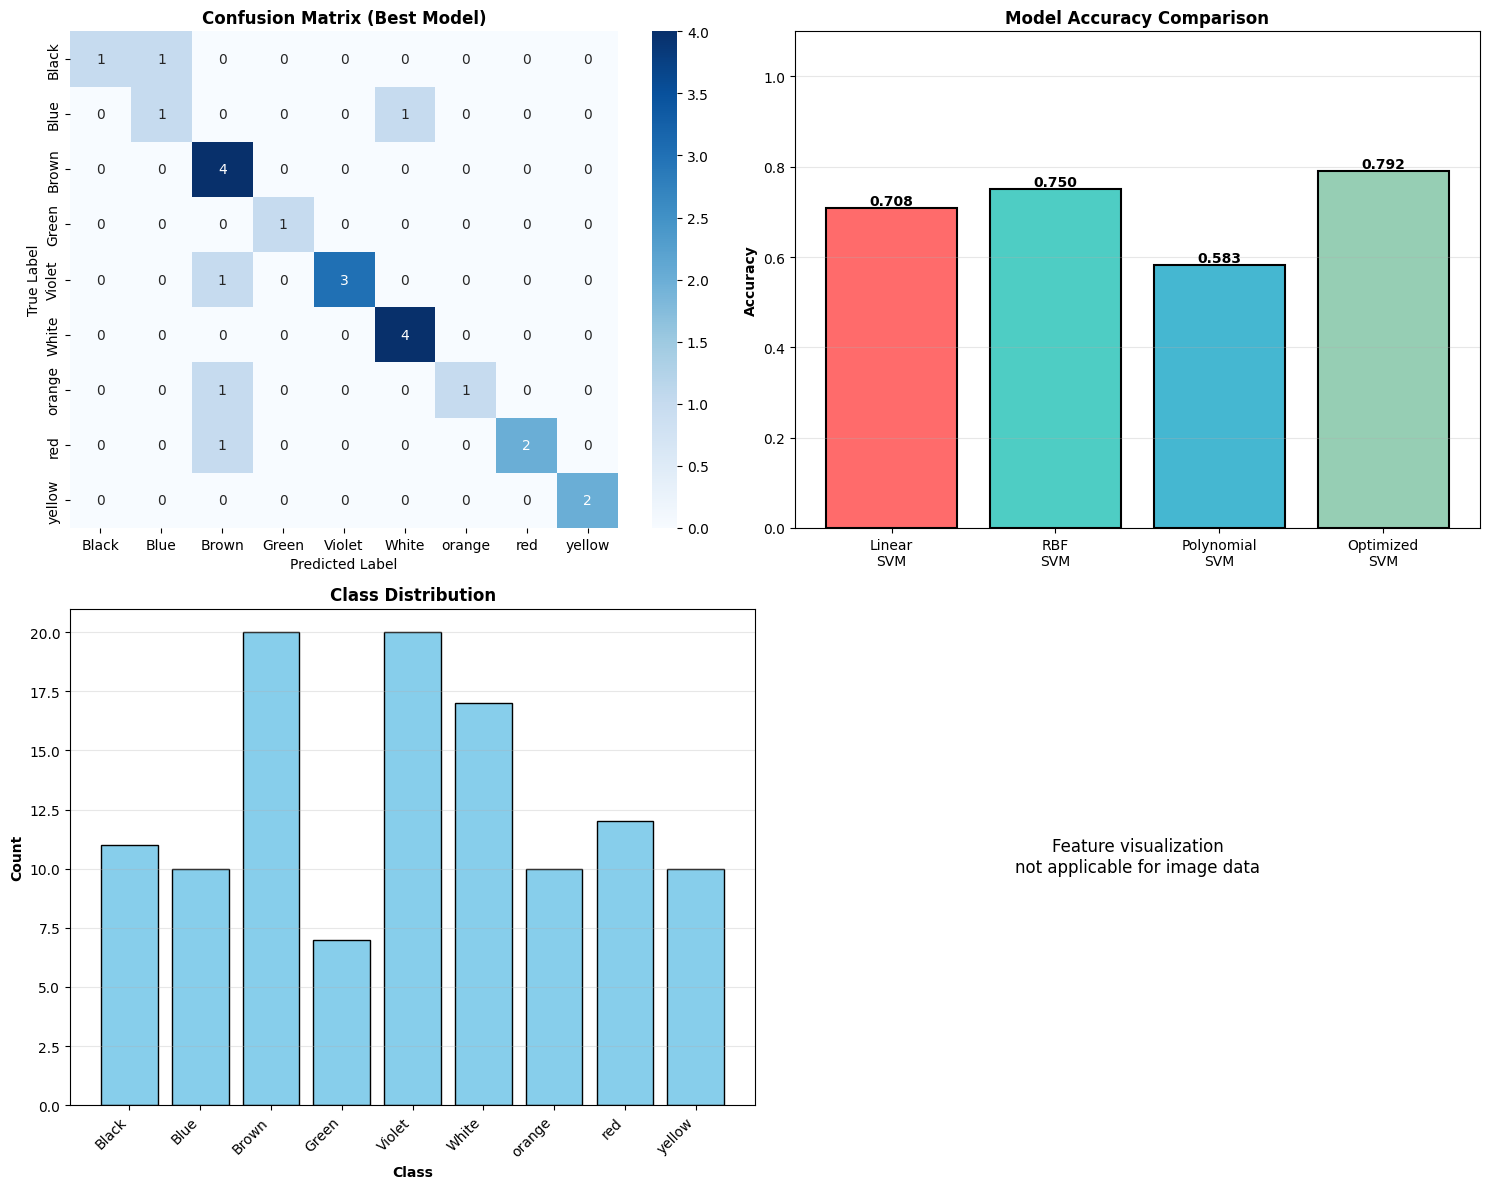


ANALYSIS COMPLETE!

Best Model: SVM with rbf kernel
Final Test Accuracy: 0.7917
Total samples processed: 117


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Download dataset - This is handled by the first cell.
# print("Downloading dataset...")
# path = kagglehub.dataset_download("ayanzadeh93/color-classification")
# print(f"Path to dataset files: {path}")

# The path variable is already defined in the first cell (T9mugovf8oc6)
# Point to correct dataset folder
dataset_dir = os.path.join(path, "ColorClassification") # Assuming "ColorClassification" contains the image folders

data = []
labels = []

print(f"Loading images from: {dataset_dir}")

# Load the dataset
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        # Exclude 'mask' folders and 'testimg' based on previous outputs
        if 'mask' not in folder.lower() and folder.lower() not in ['testimg', 'color-classification']:
            print(f"Processing folder: {folder}")
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    img = Image.open(file_path).convert("RGB")
                    img = img.resize((32, 32)) # Resize for consistency
                    data.append(np.array(img).flatten())
                    labels.append(folder)
                except Exception as e:
                    print(f"Error loading file {file_path}: {e}")
                    continue

X = np.array(data)
y = np.array(labels)

print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"\nDataset shape: {X.shape}")

# Prepare the data
# Encode labels if they are strings
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nClass labels: {le.classes_}")
print(f"Encoded labels (sample): {y_encoded[:10]}")


print(f"\nClass distribution:")
unique, counts = np.unique(y_encoded, return_counts=True)
for label, count in zip(unique, counts):
    original_label = le.inverse_transform([label])[0]
    print(f"  {original_label}: {count} samples ({count/len(y_encoded)*100:.2f}%)")


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*50)
print("TRAINING SVM MODELS")
print("="*50)

# 1. Linear SVM
print("\n1. Training Linear SVM...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"   Linear SVM Accuracy: {acc_linear:.4f}")

# 2. RBF (Radial Basis Function) SVM
print("\n2. Training RBF SVM...")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"   RBF SVM Accuracy: {acc_rbf:.4f}")

# 3. Polynomial SVM
print("\n3. Training Polynomial SVM...")
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"   Polynomial SVM Accuracy: {acc_poly:.4f}")

# 4. Hyperparameter tuning with GridSearchCV
print("\n4. Performing Hyperparameter Tuning (GridSearchCV)...")
print("   This may take a few minutes...")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n   Best parameters: {grid_search.best_params_}")
print(f"   Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model predictions
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)

print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Compare all models
print("\nModel Comparison:")
print(f"{'Model':<25} {'Accuracy':<15}")
print("-" * 40)
print(f"{'Linear SVM':<25} {acc_linear:<15.4f}")
print(f"{'RBF SVM':<25} {acc_rbf:<15.4f}")
print(f"{'Polynomial SVM':<25} {acc_poly:<15.4f}")
print(f"{'Optimized SVM (Best)':<25} {acc_best:<15.4f}")

# Detailed classification report for best model
print(f"\nDetailed Classification Report (Best Model):")
print("-" * 50)
target_names = le.classes_
print(classification_report(y_test, y_pred_best, target_names=target_names))

# Cross-validation scores
print("\nCross-Validation Scores (Best Model):")
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Confusion Matrix
print("\n" + "="*50)
print("VISUALIZATION")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=target_names, yticklabels=target_names)
axes[0, 0].set_title('Confusion Matrix (Best Model)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. Model Accuracy Comparison
models = ['Linear\nSVM', 'RBF\nSVM', 'Polynomial\nSVM', 'Optimized\nSVM']
accuracies = [acc_linear, acc_rbf, acc_poly, acc_best]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = axes[0, 1].bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Accuracy', fontweight='bold')
axes[0, 1].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim([0, 1.1])
axes[0, 1].grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Class Distribution
axes[1, 0].bar(range(len(counts)), counts, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Class', fontweight='bold')
axes[1, 0].set_ylabel('Count', fontweight='bold')
axes[1, 0].set_title('Class Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(len(target_names)))
axes[1, 0].set_xticklabels(target_names, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Feature visualization (if 3 features - RGB)
# This dataset is not 3-feature RGB, so skip this plot.
axes[1, 1].text(0.5, 0.5, 'Feature visualization\nnot applicable for image data',
                ha='center', va='center', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('svm_analysis_results.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'svm_analysis_results.png'")
plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print(f"\nBest Model: SVM with {grid_search.best_params_['kernel']} kernel")
print(f"Final Test Accuracy: {acc_best:.4f}")
print(f"Total samples processed: {len(X)}")

Generating linearly separable data...
Training Linear SVM...
Generating circular data...
Training Linear SVM on circular data...
Training RBF SVM on circular data...
Generating moon-shaped data...
Training Linear SVM on moon data...
Training RBF SVM on moon data...
Training Polynomial SVM on moon data...
Generating multi-class data...
Training Linear SVM on multi-class data...
Training RBF SVM on multi-class data...
Demonstrating effect of C parameter...

Visualization saved as 'svm_decision_boundaries.png'


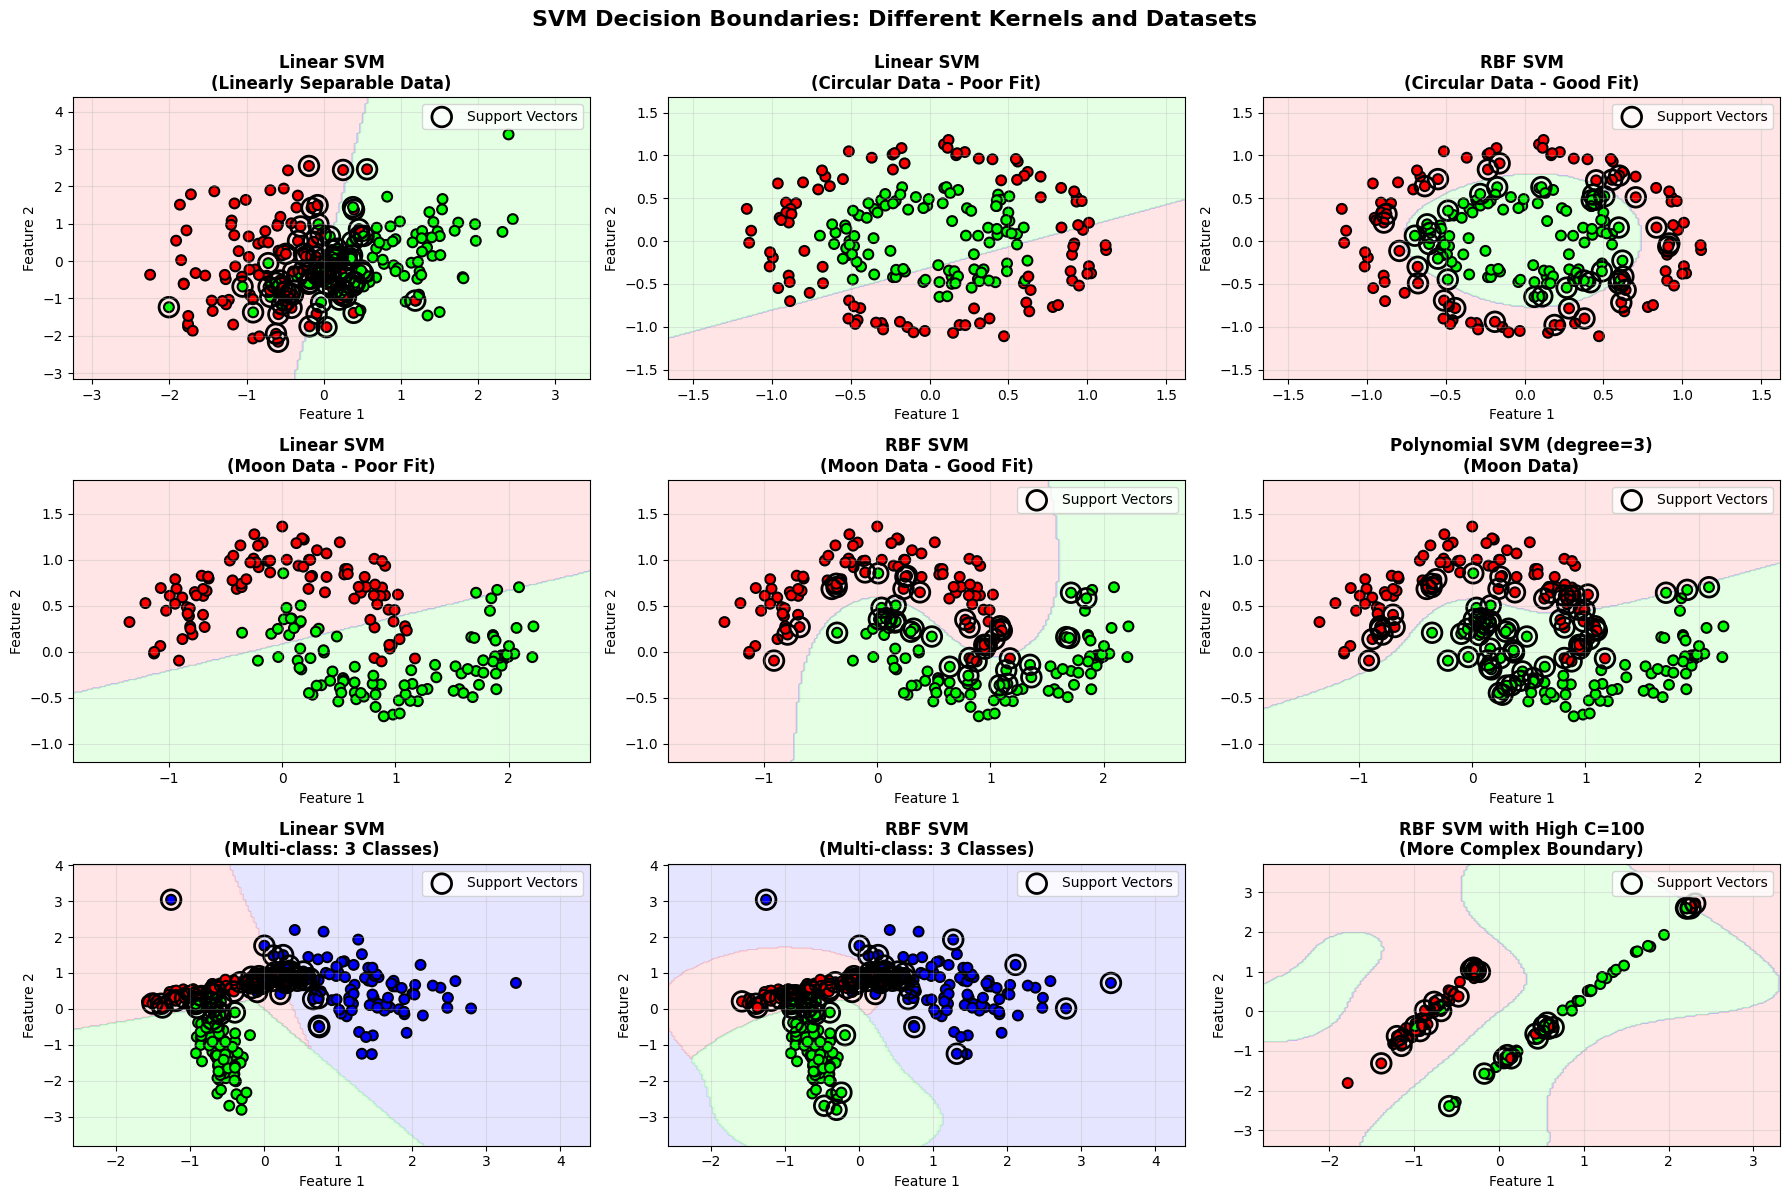


KEY OBSERVATIONS:

1. LINEAR SVM:
   - Works well for linearly separable data
   - Creates straight decision boundaries
   - Fails on circular or curved patterns

2. RBF (Radial Basis Function) SVM:
   - Handles non-linear patterns effectively
   - Creates curved, flexible decision boundaries
   - Best for complex, non-linear data

3. POLYNOMIAL SVM:
   - Creates polynomial-shaped boundaries
   - Good for moderately complex patterns
   - Degree parameter controls complexity

4. SUPPORT VECTORS:
   - Points circled in black are support vectors
   - These are critical points that define the boundary
   - Only these points affect the decision boundary

5. C PARAMETER (Regularization):
   - Low C: Simpler boundary, more tolerant to errors
   - High C: Complex boundary, tries to classify all points correctly
   - High C may lead to overfitting

6. MULTI-CLASS CLASSIFICATION:
   - SVM uses 'one-vs-one' or 'one-vs-rest' strategy
   - Creates multiple boundaries to separate all classes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Create figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ['#FF0000', '#0000FF', '#00FF00']

# ============================================
# DATASET 1: Linearly Separable Data
# ============================================
print("Generating linearly separable data...")
X_linear, y_linear = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)

# Create mesh for plotting decision boundaries
x_min, x_max = X_linear[:, 0].min() - 1, X_linear[:, 0].max() + 1
y_min, y_max = X_linear[:, 1].min() - 1, X_linear[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Train Linear SVM
print("Training Linear SVM...")
ax1 = plt.subplot(3, 3, 1)
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_linear, y_linear)
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax1.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax1.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
# Plot support vectors
ax1.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax1.set_title('Linear SVM\n(Linearly Separable Data)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(alpha=0.3)

# ============================================
# DATASET 2: Non-linear Data (Circles)
# ============================================
print("Generating circular data...")
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Linear SVM on circular data (poor performance)
print("Training Linear SVM on circular data...")
ax2 = plt.subplot(3, 3, 2)
svm_linear_circles = SVC(kernel='linear', C=1.0)
svm_linear_circles.fit(X_circles, y_circles)
Z = svm_linear_circles.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax2.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax2.set_title('Linear SVM\n(Circular Data - Poor Fit)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(alpha=0.3)

# RBF SVM on circular data (good performance)
print("Training RBF SVM on circular data...")
ax3 = plt.subplot(3, 3, 3)
svm_rbf_circles = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_circles.fit(X_circles, y_circles)
Z = svm_rbf_circles.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax3.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax3.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax3.scatter(svm_rbf_circles.support_vectors_[:, 0], svm_rbf_circles.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax3.set_title('RBF SVM\n(Circular Data - Good Fit)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()
ax3.grid(alpha=0.3)

# ============================================
# DATASET 3: Non-linear Data (Moons)
# ============================================
print("Generating moon-shaped data...")
X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)

x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Linear SVM on moon data
print("Training Linear SVM on moon data...")
ax4 = plt.subplot(3, 3, 4)
svm_linear_moons = SVC(kernel='linear', C=1.0)
svm_linear_moons.fit(X_moons, y_moons)
Z = svm_linear_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax4.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax4.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax4.set_title('Linear SVM\n(Moon Data - Poor Fit)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')
ax4.grid(alpha=0.3)

# RBF SVM on moon data
print("Training RBF SVM on moon data...")
ax5 = plt.subplot(3, 3, 5)
svm_rbf_moons = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_moons.fit(X_moons, y_moons)
Z = svm_rbf_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax5.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax5.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax5.scatter(svm_rbf_moons.support_vectors_[:, 0], svm_rbf_moons.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax5.set_title('RBF SVM\n(Moon Data - Good Fit)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Feature 1')
ax5.set_ylabel('Feature 2')
ax5.legend()
ax5.grid(alpha=0.3)

# Polynomial SVM on moon data
print("Training Polynomial SVM on moon data...")
ax6 = plt.subplot(3, 3, 6)
svm_poly_moons = SVC(kernel='poly', degree=3, C=1.0)
svm_poly_moons.fit(X_moons, y_moons)
Z = svm_poly_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax6.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax6.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax6.scatter(svm_poly_moons.support_vectors_[:, 0], svm_poly_moons.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax6.set_title('Polynomial SVM (degree=3)\n(Moon Data)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Feature 1')
ax6.set_ylabel('Feature 2')
ax6.legend()
ax6.grid(alpha=0.3)

# ============================================
# Multi-class classification
# ============================================
print("Generating multi-class data...")
X_multi, y_multi = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, n_classes=3, random_state=42
)
scaler = StandardScaler()
X_multi = scaler.fit_transform(X_multi)

x_min, x_max = X_multi[:, 0].min() - 1, X_multi[:, 0].max() + 1
y_min, y_max = X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Linear SVM - Multi-class
print("Training Linear SVM on multi-class data...")
ax7 = plt.subplot(3, 3, 7)
svm_linear_multi = SVC(kernel='linear', C=1.0)
svm_linear_multi.fit(X_multi, y_multi)
Z = svm_linear_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax7.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax7.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax7.scatter(svm_linear_multi.support_vectors_[:, 0], svm_linear_multi.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax7.set_title('Linear SVM\n(Multi-class: 3 Classes)', fontsize=12, fontweight='bold')
ax7.set_xlabel('Feature 1')
ax7.set_ylabel('Feature 2')
ax7.legend()
ax7.grid(alpha=0.3)

# RBF SVM - Multi-class
print("Training RBF SVM on multi-class data...")
ax8 = plt.subplot(3, 3, 8)
svm_rbf_multi = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_multi.fit(X_multi, y_multi)
Z = svm_rbf_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax8.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax8.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax8.scatter(svm_rbf_multi.support_vectors_[:, 0], svm_rbf_multi.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax8.set_title('RBF SVM\n(Multi-class: 3 Classes)', fontsize=12, fontweight='bold')
ax8.set_xlabel('Feature 1')
ax8.set_ylabel('Feature 2')
ax8.legend()
ax8.grid(alpha=0.3)

# ============================================
# Effect of C parameter (Regularization)
# ============================================
print("Demonstrating effect of C parameter...")
X_noise, y_noise = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, random_state=42
)
scaler = StandardScaler()
X_noise = scaler.fit_transform(X_noise)

x_min, x_max = X_noise[:, 0].min() - 1, X_noise[:, 0].max() + 1
y_min, y_max = X_noise[:, 1].min() - 1, X_noise[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

ax9 = plt.subplot(3, 3, 9)
svm_high_c = SVC(kernel='rbf', C=100.0, gamma='scale')
svm_high_c.fit(X_noise, y_noise)
Z = svm_high_c.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax9.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
ax9.scatter(X_noise[:, 0], X_noise[:, 1], c=y_noise, cmap=ListedColormap(cmap_bold),
           edgecolor='black', s=50, linewidth=1.5)
ax9.scatter(svm_high_c.support_vectors_[:, 0], svm_high_c.support_vectors_[:, 1],
           s=200, linewidth=2, facecolors='none', edgecolors='black', label='Support Vectors')
ax9.set_title('RBF SVM with High C=100\n(More Complex Boundary)', fontsize=12, fontweight='bold')
ax9.set_xlabel('Feature 1')
ax9.set_ylabel('Feature 2')
ax9.legend()
ax9.grid(alpha=0.3)

plt.suptitle('SVM Decision Boundaries: Different Kernels and Datasets',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('svm_decision_boundaries.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'svm_decision_boundaries.png'")
plt.show()

print("\n" + "="*60)
print("KEY OBSERVATIONS:")
print("="*60)
print("\n1. LINEAR SVM:")
print("   - Works well for linearly separable data")
print("   - Creates straight decision boundaries")
print("   - Fails on circular or curved patterns")

print("\n2. RBF (Radial Basis Function) SVM:")
print("   - Handles non-linear patterns effectively")
print("   - Creates curved, flexible decision boundaries")
print("   - Best for complex, non-linear data")

print("\n3. POLYNOMIAL SVM:")
print("   - Creates polynomial-shaped boundaries")
print("   - Good for moderately complex patterns")
print("   - Degree parameter controls complexity")

print("\n4. SUPPORT VECTORS:")
print("   - Points circled in black are support vectors")
print("   - These are critical points that define the boundary")
print("   - Only these points affect the decision boundary")

print("\n5. C PARAMETER (Regularization):")
print("   - Low C: Simpler boundary, more tolerant to errors")
print("   - High C: Complex boundary, tries to classify all points correctly")
print("   - High C may lead to overfitting")

print("\n6. MULTI-CLASS CLASSIFICATION:")
print("   - SVM uses 'one-vs-one' or 'one-vs-rest' strategy")
print("   - Creates multiple boundaries to separate all classes")
print("="*60)

In [ ]:
# Point to correct dataset folder
dataset_dir = os.path.join(path, "ColorClassification")  # or "colorclassification"

data = []
labels = []

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path).convert("RGB")
                img = img.resize((32, 32))
                data.append(np.array(img).flatten())
                labels.append(folder)
            except:
                continue

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape, y.shape)


Dataset shape: (425, 3072) (425,)


In [ ]:
dataset_dir = os.path.join(path, "ColorClassification")
print("Classes:", os.listdir(dataset_dir))


Classes: ['mask_orange', 'images.txt', 'orange', 'yellow', 'hw3.m~', 'testimg', 'Black', 'mask_black', 'Blue', 'mask_violet', 'White', 'Green', 'timages.txt', 'color-classification', 'm_images.txt', 'mask_blue', 'mask_test', 'tm_images.txt', 'red', 'mask_brown', 'mask_red', 'mask_white', 'mask_green', 'mask_yellow', 'Violet', 'Brown']


In [ ]:
data = []
labels = []

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path).convert("RGB")
                img = img.resize((32, 32))
                data.append(np.array(img).flatten())
                labels.append(folder)
            except:
                continue

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape, y.shape)


Dataset shape: (425, 3072) (425,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel="rbf", C=10, gamma="scale")
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.24705882352941178

Classification Report:
               precision    recall  f1-score   support

       Black       0.00      0.00      0.00         2
        Blue       0.33      0.50      0.40         2
       Brown       0.80      1.00      0.89         4
       Green       0.00      0.00      0.00         1
      Violet       0.20      0.25      0.22         4
       White       0.75      0.75      0.75         4
  mask_black       0.00      0.00      0.00         2
   mask_blue       0.00      0.00      0.00         2
  mask_brown       0.33      0.50      0.40         4
  mask_green       0.00      0.00      0.00         2
 mask_orange       0.00      0.00      0.00         2
    mask_red       0.00      0.00      0.00         2
   mask_test       0.10      0.11      0.10        19
 mask_violet       0.00      0.00      0.00         4
  mask_white       1.00      0.67      0.80         3
 mask_yellow       0.00      0.00      0.00         2
      orange       0.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


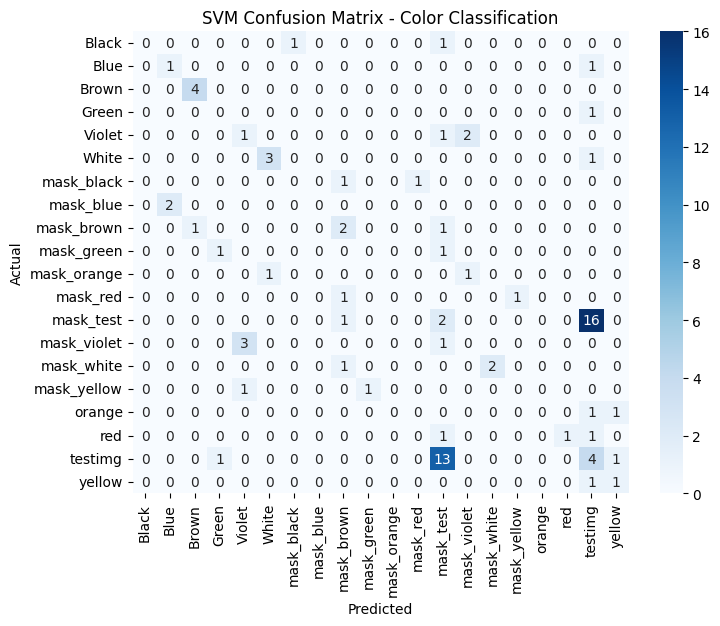

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix - Color Classification")
plt.show()


Accuracy: 0.24705882352941178

Classification Report:
               precision    recall  f1-score   support

       Black       0.00      0.00      0.00         2
        Blue       0.33      0.50      0.40         2
       Brown       0.80      1.00      0.89         4
       Green       0.00      0.00      0.00         1
      Violet       0.20      0.25      0.22         4
       White       0.75      0.75      0.75         4
  mask_black       0.00      0.00      0.00         2
   mask_blue       0.00      0.00      0.00         2
  mask_brown       0.33      0.50      0.40         4
  mask_green       0.00      0.00      0.00         2
 mask_orange       0.00      0.00      0.00         2
    mask_red       0.00      0.00      0.00         2
   mask_test       0.10      0.11      0.10        19
 mask_violet       0.00      0.00      0.00         4
  mask_white       1.00      0.67      0.80         3
 mask_yellow       0.00      0.00      0.00         2
      orange       0.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


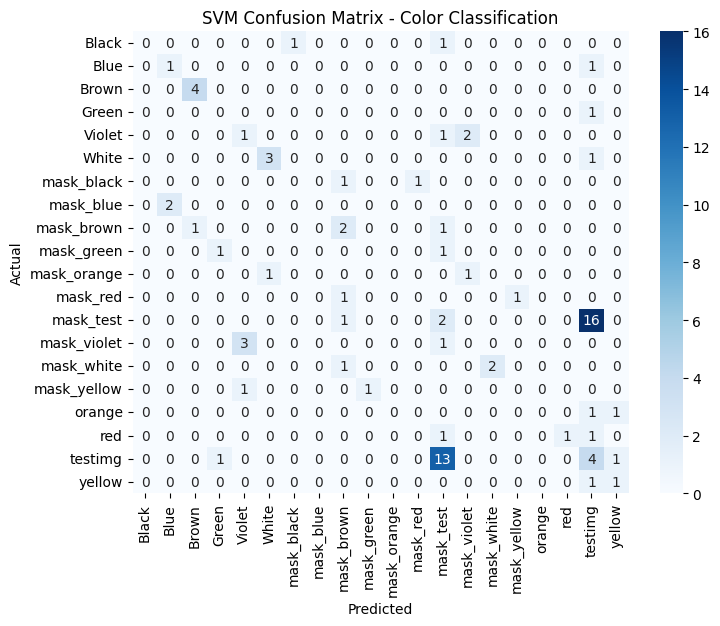

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix - Color Classification")
plt.show()
